In [ ]:
import os

os.listdir("../data")

In [1]:
import pandas as pd

rainfall_df = pd.read_csv("../data/rainfall.csv")
rainfall_df.head()


,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [3]:
import os

os.listdir("../data")



['pesticides.csv', 'rainfall.csv', 'temp.csv', 'yield.csv', 'yield_df.csv']

In [4]:
pesticides_df = pd.read_csv("../data/pesticides.csv")
rainfall_df = pd.read_csv("../data/rainfall.csv")
temperature_df = pd.read_csv("../data/temp.csv")
yield_df = pd.read_csv("../data/yield.csv")

pesticides_df.head(), rainfall_df.head(), temperature_df.head(), yield_df.head()


(           Domain     Area Element                Item  Year  \
 0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
 1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
 2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
 3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
 4  Pesticides Use  Albania     Use  Pesticides (total)  1994   
 
                            Unit  Value  
 0  tonnes of active ingredients  121.0  
 1  tonnes of active ingredients  121.0  
 2  tonnes of active ingredients  121.0  
 3  tonnes of active ingredients  121.0  
 4  tonnes of active ingredients  201.0  ,
           Area  Year average_rain_fall_mm_per_year
 0  Afghanistan  1985                           327
 1  Afghanistan  1986                           327
 2  Afghanistan  1987                           327
 3  Afghanistan  1989                           327
 4  Afghanistan  1990                           327,
    year        country  avg_temp
 0  1849

In [5]:
print("Pesticides:", pesticides_df.shape)
print("Rainfall:", rainfall_df.shape)
print("Temperature:", temperature_df.shape)
print("Yield:", yield_df.shape)


Pesticides: (4349, 7)
Rainfall: (6727, 3)
Temperature: (71311, 3)
Yield: (56717, 12)


In [6]:
print(pesticides_df.columns)
print(rainfall_df.columns)
print(temperature_df.columns)
print(yield_df.columns)


Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
Index(['year', 'country', 'avg_temp'], dtype='object')
Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')


In [7]:
yield_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [8]:
print("Pesticides missing values:\n", pesticides_df.isnull().sum())
print("\nRainfall missing values:\n", rainfall_df.isnull().sum())
print("\nTemperature missing values:\n", temperature_df.isnull().sum())
print("\nYield missing values:\n", yield_df.isnull().sum())


Pesticides missing values:
 Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

Rainfall missing values:
  Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64

Temperature missing values:
 year           0
country        0
avg_temp    2547
dtype: int64

Yield missing values:
 Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64


In [9]:
# Fill numerical missing values with mean
pesticides_df.fillna(pesticides_df.mean(numeric_only=True), inplace=True)
rainfall_df.fillna(rainfall_df.mean(numeric_only=True), inplace=True)
temperature_df.fillna(temperature_df.mean(numeric_only=True), inplace=True)

# Drop rows with missing target (yield)
yield_df.dropna(inplace=True)


In [10]:
set(pesticides_df.columns) & set(rainfall_df.columns) & set(temperature_df.columns) & set(yield_df.columns)


set()

In [11]:
print("Pesticides columns:\n", pesticides_df.columns, "\n")
print("Rainfall columns:\n", rainfall_df.columns, "\n")
print("Temperature columns:\n", temperature_df.columns, "\n")
print("Yield columns:\n", yield_df.columns)


Pesticides columns:
 Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object') 

Rainfall columns:
 Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object') 

Temperature columns:
 Index(['year', 'country', 'avg_temp'], dtype='object') 

Yield columns:
 Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')


In [12]:
# Fix rainfall column name (remove leading space)
rainfall_df.rename(columns={" Area": "Area"}, inplace=True)

# Make year column consistent
temperature_df.rename(columns={"year": "Year", "country": "Area"}, inplace=True)

# Rename yield value column for clarity
yield_df.rename(columns={"Value": "Yield"}, inplace=True)


In [13]:
print("Pesticides:", pesticides_df.columns)
print("Rainfall:", rainfall_df.columns)
print("Temperature:", temperature_df.columns)
print("Yield:", yield_df.columns)


Pesticides: Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Rainfall: Index(['Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
Temperature: Index(['Year', 'Area', 'avg_temp'], dtype='object')
Yield: Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Yield'],
      dtype='object')


In [14]:
merged_df = yield_df.merge(
    rainfall_df,
    on=["Area", "Year"],
    how="inner"
)

merged_df.head()


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Yield,average_rain_fall_mm_per_year
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1985,1985,hg/ha,16652,327
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1986,1986,hg/ha,16875,327
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1987,1987,hg/ha,17020,327
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1989,1989,hg/ha,16963,327
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1990,1990,hg/ha,17582,327


In [15]:
merged_df = merged_df.merge(
    temperature_df,
    on=["Area", "Year"],
    how="inner"
)

merged_df.head()


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Yield,average_rain_fall_mm_per_year,avg_temp
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1985,1985,hg/ha,16652,327,15.52
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1986,1986,hg/ha,16875,327,14.71
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1987,1987,hg/ha,17020,327,15.46
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1989,1989,hg/ha,16963,327,14.46
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1990,1990,hg/ha,17582,327,15.45


In [16]:
merged_df = merged_df.merge(
    pesticides_df[["Area", "Year", "Value"]],
    on=["Area", "Year"],
    how="inner"
)

merged_df.rename(columns={"Value": "Pesticides"}, inplace=True)

merged_df.head()


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Yield,average_rain_fall_mm_per_year,avg_temp,Pesticides
0,QC,Crops,3,Albania,5419,Yield,56,Maize,1990,1990,hg/ha,36613,1485,16.37,121.0
1,QC,Crops,3,Albania,5419,Yield,56,Maize,1991,1991,hg/ha,29068,1485,15.36,121.0
2,QC,Crops,3,Albania,5419,Yield,56,Maize,1992,1992,hg/ha,24876,1485,16.06,121.0
3,QC,Crops,3,Albania,5419,Yield,56,Maize,1993,1993,hg/ha,24185,1485,16.05,121.0
4,QC,Crops,3,Albania,5419,Yield,56,Maize,1994,1994,hg/ha,25848,1485,16.96,201.0


In [17]:
merged_df.shape


(28248, 15)

In [18]:
# Select features (X) and target (y)
X = merged_df.drop(columns=["Yield"])
y = merged_df["Yield"]

X.head(), y.head()


(  Domain Code Domain  Area Code     Area  Element Code Element  Item Code  \
 0          QC  Crops          3  Albania          5419   Yield         56   
 1          QC  Crops          3  Albania          5419   Yield         56   
 2          QC  Crops          3  Albania          5419   Yield         56   
 3          QC  Crops          3  Albania          5419   Yield         56   
 4          QC  Crops          3  Albania          5419   Yield         56   
 
     Item  Year Code  Year   Unit average_rain_fall_mm_per_year  avg_temp  \
 0  Maize       1990  1990  hg/ha                          1485     16.37   
 1  Maize       1991  1991  hg/ha                          1485     15.36   
 2  Maize       1992  1992  hg/ha                          1485     16.06   
 3  Maize       1993  1993  hg/ha                          1485     16.05   
 4  Maize       1994  1994  hg/ha                          1485     16.96   
 
    Pesticides  
 0       121.0  
 1       121.0  
 2       121.0 

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((22598, 14), (5650, 14))

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model = RandomForestRegressor( n_estimators=100, random_state=42, n_jobs=-1)


In [ ]:
model.fit(X_train, y_train)


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
categorical_cols = X_train.select_dtypes(include=["object"]).columns
categorical_cols


Index(['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit',
       'average_rain_fall_mm_per_year'],
      dtype='object')

In [26]:
encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


In [27]:
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = model.predict(X_test)


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(3616.606440707965, 10054.26634804332, 0.9862768040564818)

In [31]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
6,Item Code,0.574064
12,avg_temp,0.088339
11,average_rain_fall_mm_per_year,0.088153
13,Pesticides,0.082049
7,Item,0.054919
3,Area,0.050134
2,Area Code,0.030354
9,Year,0.016282
8,Year Code,0.015705
1,Domain,0.000000


In [33]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - --------------------


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


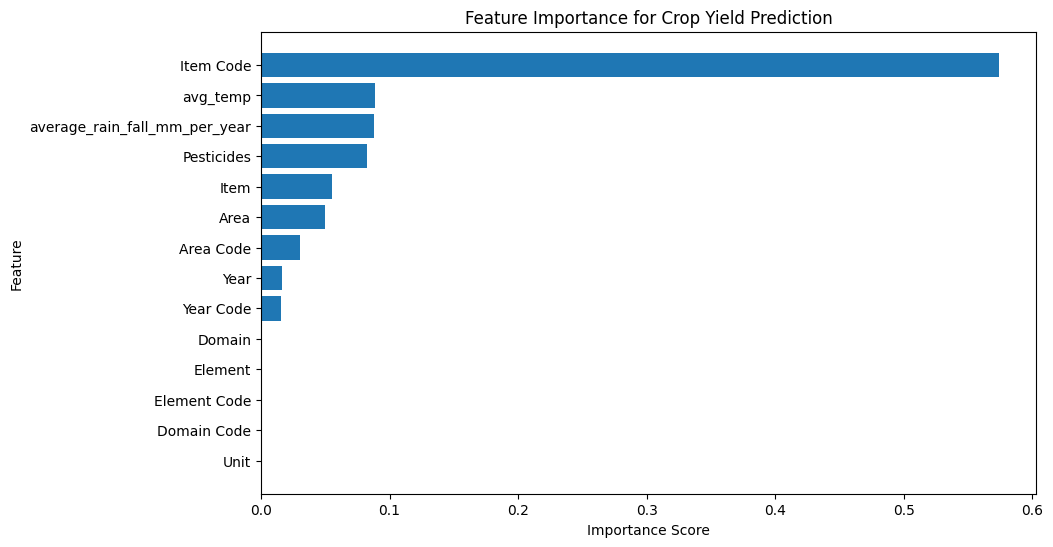

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Crop Yield Prediction")
plt.gca().invert_yaxis()
plt.show()


In [35]:
import joblib
joblib.dump(model, "../backend/model.pkl")


['../backend/model.pkl']